In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("train_1.csv")

In [3]:
ex_df = pd.read_csv('Exog_Campaign_eng')

In [4]:
ex_df['Exog'].unique()

array([0, 1], dtype=int64)

In [5]:
ex_df['Exog'].sum()

54

In [6]:
df.shape

(145063, 551)

In [9]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [10]:
df['Page']

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

In [13]:
df['Page'][0]

'2NE1_zh.wikipedia.org_all-access_spider'

In [12]:
df['Page'][145062]

'Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider'

In [7]:
import re
def split_page_details(x):
    val = re.search(r'\.[a-z]+\.org',x)
    res = x.split(val[0])
    res1 = res[0].split('_')[-1]
    res2,res3 = res[1][1:].split('_')
#     return res
    if res1 not in ['en','ja','de','fr','zh','ru','es']:
        res1 = 'no_lang'
    return [res1,res2,res3]
#     return dict(zip(['language','access_type','access_origin'],[res1,res2,res3]))

In [8]:
val = 'Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider'
print(split_page_details(val))

['es', 'all-access', 'spider']


In [9]:
df[['language','access_type','access_origin']] = df.apply(lambda x : split_page_details(x['Page']),axis=1,result_type ='expand')

In [10]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,language,access_type,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,12.0,13.0,3.0,5.0,10.0,es,all-access,spider
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,all-access,spider
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,all-access,spider
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,all-access,spider


<AxesSubplot:>

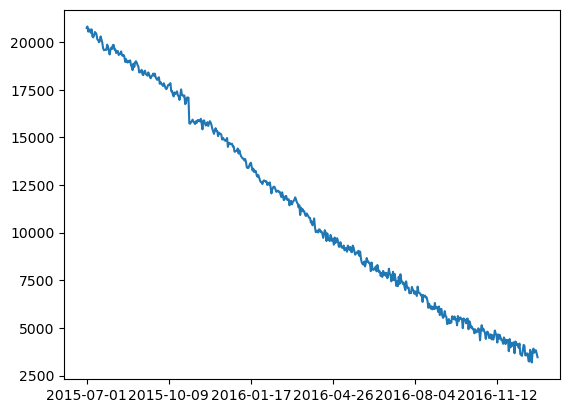

In [15]:
df.isna().sum()[1:-3].plot()

C:\Users\bharath.d.reddy\AppData\Local\Temp\ipykernel_2088\544976047.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,1:-2].mean().plot()


<AxesSubplot:>

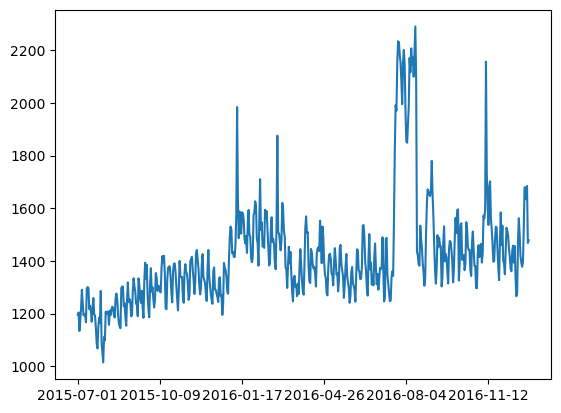

In [20]:
df.iloc[:,1:-2].mean().plot()

In [21]:
df.iloc[:,1:-2].groupby('language').mean().plot()

<AxesSubplot:xlabel='language'>

Error in callback <function flush_figures at 0x000002EE979A6940> (for post_execute):


KeyboardInterrupt: 

In [40]:
# df_lan = df.iloc[:,1:-2].groupby('language').mean().T.reset_index()
df_lan = df.iloc[:,1:-2].groupby('language').mean().reset_index()

In [43]:
df_lan = pd.melt(df_lan, id_vars='language',value_vars=df.columns[1:-3],var_name='date',value_name='views')

In [44]:
df_lan.head()

,language,date,views
0,de,2015-07-01,801.433519
1,en,2015-07-01,4120.242704
2,es,2015-07-01,1176.993529
3,fr,2015-07-01,526.624206
4,ja,2015-07-01,637.635044


<AxesSubplot:xlabel='date', ylabel='views'>

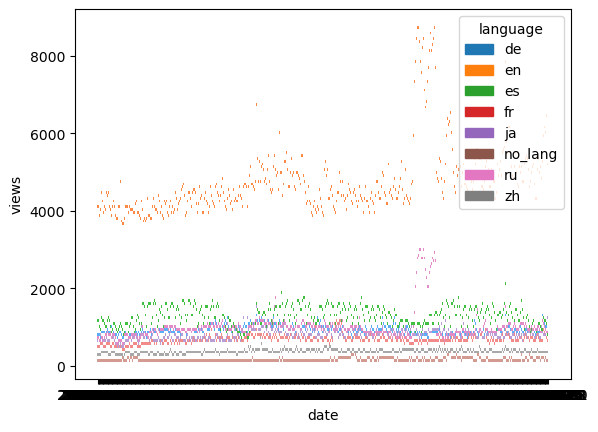

In [46]:
sns.histplot(x='date',y='views',hue='language',data=df_lan)

In [49]:
df_language = df.iloc[:,1:-2].groupby('language').mean().T

In [50]:
df_language.reset_index(inplace=True)
df_language.set_index('index', inplace=True)

In [51]:
df_language

language,de,en,es,fr,ja,no_lang,ru,zh
index,,,,,,,,
2015-07-01,801.433519,4120.242704,1176.993529,526.624206,637.635044,120.165592,694.492845,306.174324
2015-07-02,790.469330,4096.969675,1125.926357,530.038727,732.300645,127.193583,706.667866,306.180041
2015-07-03,758.689914,3863.318780,1035.044477,509.429958,661.188706,119.130165,654.068973,304.711372
2015-07-04,697.106317,4020.385549,972.426566,544.347518,830.489442,102.536659,615.880100,307.106882
2015-07-05,809.890360,4157.757910,1056.349179,534.101778,796.904439,114.300295,655.269262,326.373163
...,...,...,...,...,...,...,...,...
2016-12-27,1095.848843,6189.329381,1138.872438,861.947656,804.676399,166.680211,1008.121724,380.391169
2016-12-28,1042.817652,6032.638712,1184.690560,777.255710,806.809621,211.060804,938.610821,382.556091
2016-12-29,1004.514348,6425.295920,1117.971921,755.727032,883.427658,167.100070,903.053531,354.776010


In [52]:
total_view=df_language.copy()

In [55]:
total_view.head()

language,de,en,es,fr,ja,no_lang,ru,zh
index,,,,,,,,
2015-07-01,801.433519,4120.242704,1176.993529,526.624206,637.635044,120.165592,694.492845,306.174324
2015-07-02,790.469330,4096.969675,1125.926357,530.038727,732.300645,127.193583,706.667866,306.180041
2015-07-03,758.689914,3863.318780,1035.044477,509.429958,661.188706,119.130165,654.068973,304.711372
2015-07-04,697.106317,4020.385549,972.426566,544.347518,830.489442,102.536659,615.880100,307.106882
2015-07-05,809.890360,4157.757910,1056.349179,534.101778,796.904439,114.300295,655.269262,326.373163


In [56]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    # if prob <0.05 then its stationary
df_test(total_view['en'])

ADF Stastistic: -2.540599
p-value: 0.105906


In [60]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        #print(val)
        #print(val[0][0:2] )

        return val[0][0:2]

    return 'no_lang'

df['language_new']=df['Page'].apply(lambda x: lang(str(x)))

In [61]:
df['language_new'].value_counts()

en         24108
ja         20431
de         18547
no_lang    17855
fr         17802
zh         17229
ru         15022
es         14069
Name: language_new, dtype: int64

In [62]:
df['language'].value_counts()

en         24108
ja         20431
de         18547
no_lang    17855
fr         17802
zh         17229
ru         15022
es         14069
Name: language, dtype: int64

In [63]:
ts=total_view['en']

In [74]:
ts

index
2015-07-01    4120.242704
2015-07-02    4096.969675
2015-07-03    3863.318780
2015-07-04    4020.385549
2015-07-05    4157.757910
                 ...     
2016-12-27    6189.329381
2016-12-28    6032.638712
2016-12-29    6425.295920
2016-12-30    5353.679346
2016-12-31    5180.347343
Name: en, Length: 550, dtype: float64

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(ts, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
model.plot();